In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Анализ данных из CSV файла Nvidia Stock History

Чтение данных из CSV файла и изучение информации о DataFrame

In [71]:
data = pd.read_csv('Nvidia_stock_history.csv') 

In [72]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.401941,0.448595,0.356484,0.376820,271468800.0,0.0,0.0
1,1999-01-25,0.406726,0.421081,0.376820,0.416296,51048000.0,0.0,0.0
2,1999-01-26,0.421081,0.429455,0.378016,0.383998,34320000.0,0.0,0.0
3,1999-01-27,0.385194,0.394764,0.363661,0.382801,24436800.0,0.0,0.0
4,1999-01-28,0.382801,0.385194,0.379212,0.381605,22752000.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5738,2021-11-08,301.489990,311.000000,299.070007,308.040009,50310100.0,0.0,0.0
5739,2021-11-09,322.820007,323.100006,299.640015,306.570007,64674600.0,0.0,0.0
5740,2021-11-10,293.559998,308.500000,287.779999,294.589996,63620600.0,0.0,0.0
5741,2021-11-11,304.679993,305.899994,297.769989,303.899994,33217200.0,0.0,0.0


In [73]:
data[data.duplicated()]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits


Обработка пропусков

In [74]:
data.isnull().sum()

Date            0
Open            1
High            1
Low             1
Close           1
Volume          1
Dividends       0
Stock Splits    0
dtype: int64

In [75]:
data[data['Open'].isna()]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
665,2001-09-12,NaN,NaN,NaN,NaN,NaN,0.0,2.0


In [76]:
data = data.fillna(method = 'ffill')

In [77]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Изучение данных в DataFrame

Графики открытия, закрытия, самой высокой, низкой цен, а также отражение объёма торгов, дивидендов и сплитов акций

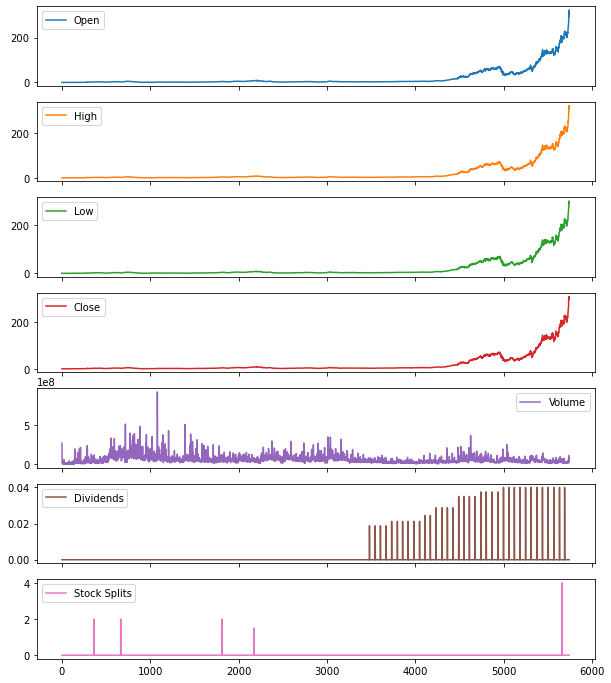

In [78]:
data.plot(subplots = True, figsize = (10,12))
plt.show()

График: История закрытия цен

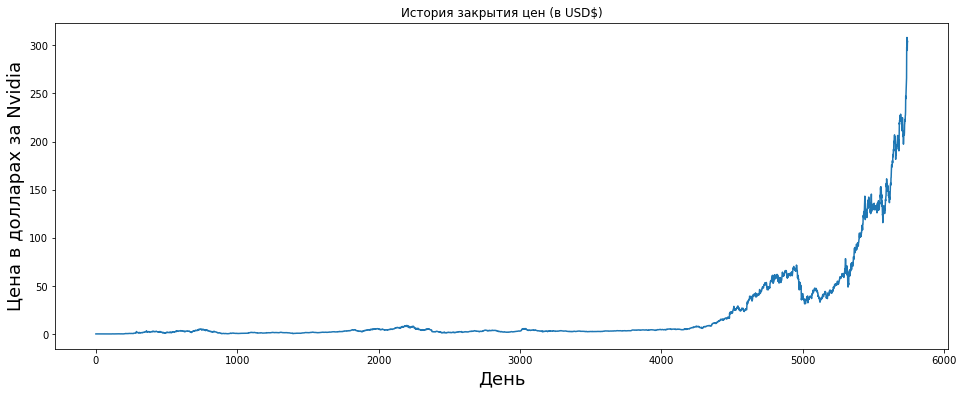

In [79]:
plt.figure(figsize=(16,6))
plt.title('История закрытия цен (в USD$)')
plt.plot(data['Close'])
plt.xlabel('День', fontsize=18)
plt.ylabel('Цена в долларах за Nvidia', fontsize=18)
plt.show()

График: История закрытия цен (в USD$) за последние 5 лет со средней скользящей ценой (MAVG)

In [80]:
close_px = data['Close'][4000:]
mavg = close_px.rolling(window=50).mean()

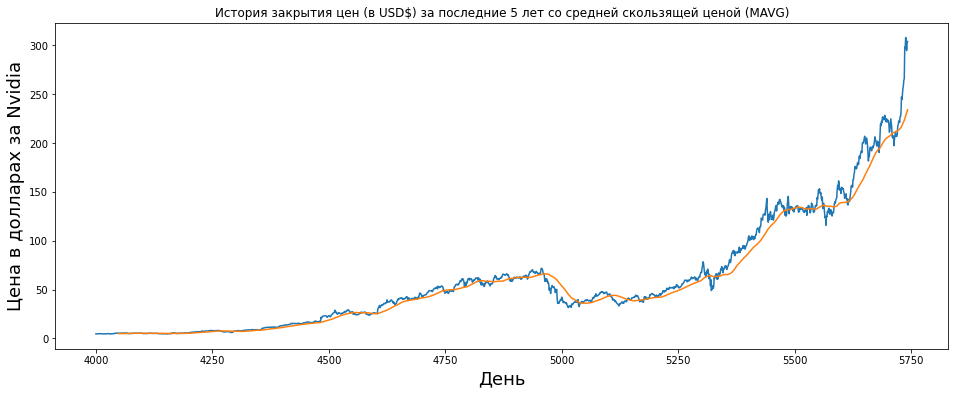

In [81]:
plt.figure(figsize=(16,6))
plt.title('История закрытия цен (в USD$) за последние 5 лет со средней скользящей ценой (MAVG)')
plt.plot(data['Close'][4000:])
plt.xlabel('День', fontsize=18)
plt.ylabel('Цена в долларах за Nvidia', fontsize=18)
mavg.plot(label='mavg')
plt.show()

График: Норма прибыли(Показывает положительные и отрицательные изменения за 5 лет)

Text(0.5, 1.0, 'Норма прибыли')

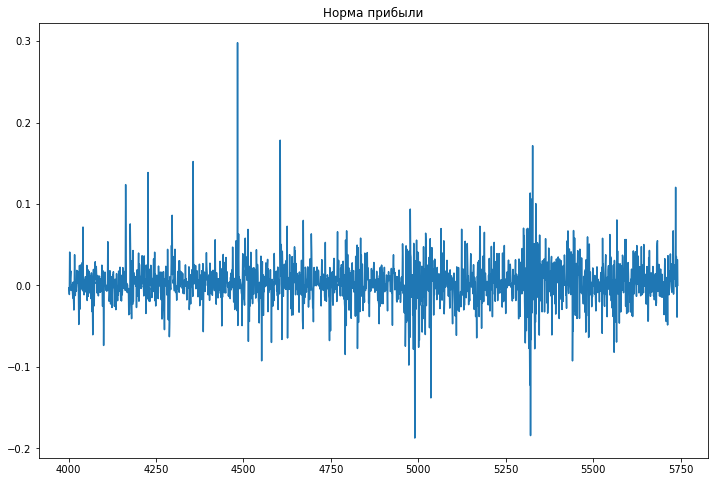

In [82]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return', figsize=(12,8))
plt.title('Норма прибыли')

График: Ежедневное процентное изменение

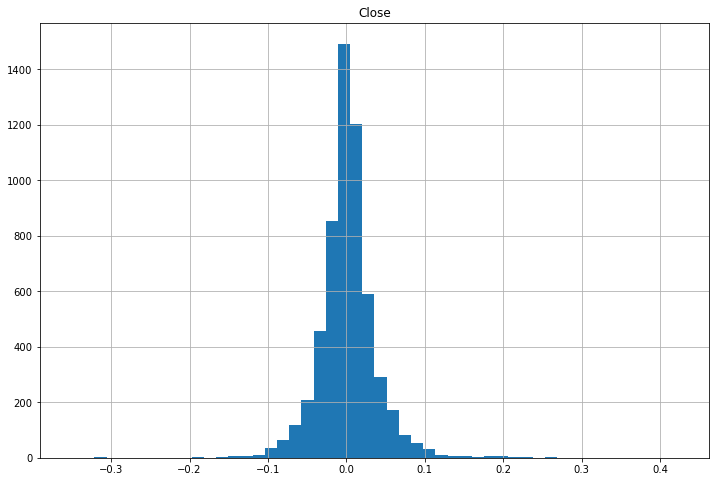

In [39]:
daily_close_px = data[['Close']]

daily_pct_change = daily_close_px.pct_change()

daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

plt.show()

График: Общая волатильность акций за всю историю 

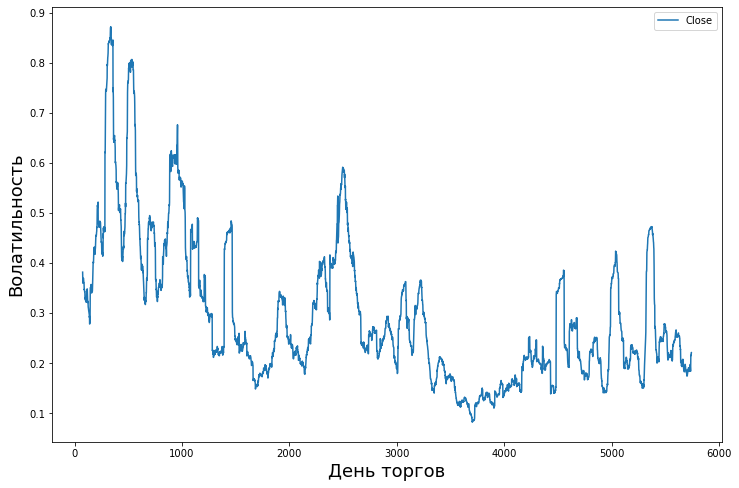

In [44]:
vol = daily_pct_change.rolling(75).std() * np.sqrt(75) 
vol.plot(figsize=(12, 8))
plt.xlabel('День торгов', fontsize=18)
plt.ylabel('Волатильность', fontsize=18)
plt.show()